# **Linear Regression Model**
----

## **Context: Hospital Lenght of Stay (LOS) Prediction**

Hospital management is a vital area that gained a lot of attention during the COVID-19 pandemic. **Inefficient distribution of resources like beds, ventilators might lead to a lot of complications**. However, this can be mitigated by **predicting the length of stay (LOS) of a patient before getting admitted**. Once this is determined, the hospital can plan a suitable treatment, resources, and staff to reduce the LOS and increase the chances of recovery. The rooms and bed can also be planned in accordance with that.

**HealthPlus hospital has been incurring a lot of losses in revenue and life due to its inefficient management system.** They have been unsuccessful in allocating pieces of equipment, beds, and hospital staff fairly. **A system that could estimate the length of stay (LOS) of a patient can solve this problem to a great extent.**

### **Objective:**

As a Data Scientist, you have been hired by HealthPlus to analyze the data, find out **what factors affect the LOS the most, and come up with a machine learning model which can predict the LOS of a patient** using the data available during admission and after running a few tests. Also, **bring about useful insights and policies from the data, which can help the hospital to improve their health care infrastructure and revenue.**

### **Data Dictionary:**

The data contains various information recorded during the time of admission of the patient. It only contains **records of patients who were admitted to the hospital.** The detailed data dictionary is given below:


* **patientid**: Patient ID
* **Age**: Range of age of the patient
* **gender**: Gender of the patient
* **Type of Admission**: Trauma, emergency or urgent
* **Severity of Illness**: Extreme, moderate, or minor
* **health_condition**s: Any previous health conditions suffered by the patient
* **Visitors with Patient**: The number of patients who accompany the patient
* **Insurance**: Does the patient have health insurance or not?
* **Admission_Deposit**: The deposit paid by the patient during admission
* **Stay (in days)**: The number of days that the patient has stayed in the hospital. This is the **target variable**
* **Available Extra Rooms in Hospital**: The number of rooms available during admission
* **Department**: The department which will be treating the patient
* **Ward_Facility_Code**: The code of the ward facility in which the patient will be admitted
* **doctor_name**: The doctor who will be treating the patient
* **staff_available**: The number of staff who are not occupied at the moment in the ward

### **Approach to solve the problem:**

1. Import the necessary libraries
2. Read the dataset and get an overview
3. Exploratory data analysis - a. Univariate b. Bivariate
4. Data preprocessing if any
5. Define the performance metric and build ML models
6. Checking for assumptions
7. Compare models and determine the best one
8. Observations and business insights

----


## **Prelinimaries**


### **Google Colab**

The following is required if we are runing the code in Colab.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Note: To *code out* more than one line:
* Windows/Linux: Select the lines you wish to comment out, then press Ctrl + /.
* macOS: Select the lines you wish to comment out, then press Cmd + /.

### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor

# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

### **Importing the Data**

Read the healthcare dataset file. Run the first line if running on Google Colab,
and the second one if running locally.

In [3]:

# data = pd.read_csv("/content/drive/MyDrive/MIT Machine Learning/Week_4/Codes and Data/healthcare_data.csv")
data = pd.read_csv('G:\My Drive\Cursos_USM\Supervised Machine Learning\Data\healthcare_data.csv')

In [4]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()


### **Data Overview**

To view the first and last 5 rows of the dataset:

In [5]:
data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [6]:
data.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.795901,10
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550257,11
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930075,8
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.127772,23
499999,3,gynecology,F,Dr Sophia,3,45008,41-50,Female,Trauma,Moderate,Heart disease,4,Yes,4713.868519,10


Let's check the shape of the data:

In [7]:
data.shape

(500000, 15)

- The dataset has 500,000 rows and 15 columns.

Checking the info of the data:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

To check the number of non-null values in the health_conditions column, we can use the **notnull()** method combined with the **sum()** method. The **notnull()** method returns a Boolean Series indicating whether each value is not null (True for non-null values and False for null values), and the **sum()** method then counts the number of True values, effectively giving you the number of non-null entries in the specified column.

In [9]:
non_null_count = data['health_conditions'].notnull().sum()

# Display the result
print(f"Number of non-null values in 'health_conditions': {non_null_count}")

Number of non-null values in 'health_conditions': 348112


**Note:**

- f"": The f before the quotation marks indicates a formatted string literal, which allows for embedding expressions inside string literals using {}.
- {non_null_count}: This is a placeholder for the variable non_null_count. The value of non_null_count is inserted into the string at this position.

**Observations:**

-  Available Extra Rooms in Hospital, staff_available, patientid, Visitors with Patient, Admission_Deposit, and Stay (in days) are of **numeric data type** and the rest of the columns are of **object data type**.
- The number of non-null values is the same as the total number of entries in the data for most variables.
- The column patientid is an identifier for patients in the data. This column will not help the our analysis so we can drop it.

How many times a patient has been admited to the hospital? The **value_counts()** method is commonly used to count the number of occurrences of each unique value in a column, which can be particularly useful for understanding the distribution of categorical data, such as patient IDs in our dataset.

In [10]:
# To view patientid and the number of times they have been admitted to the hospital
data['patientid'].value_counts()

patientid
126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: count, Length: 126399, dtype: int64

**Observation:**

- The maximum number of times the same patient admitted to the hospital is 21 and minimum is 1.

Given that we have already calculated the frequency of admissions for each patient using the **value_counts()** method on the "patientid" column, we can use this result to find out how many patients have been admitted a specific number of times (e.g., 21 times, 20 times, etc.). We can achieve this by applying **value_counts** again on the result of the first **value_counts**, which will give us the "frequency of frequencies". 

In [11]:
frequency = data['patientid'].value_counts()

# Count how many patients have been admitted a specific number of times
frequency_table = frequency.value_counts().sort_index(ascending=False)

# To display the frequency_table (i.e., how many patients have been admitted 21 times, 20 times, etc.)
print(frequency_table)

count
21        4
19        6
18       16
17       26
16       57
15       94
14      205
13      346
12      614
11      952
10     1691
9      2608
8      4294
7      6773
6     10374
5     15066
4     19513
3     23452
2     23107
1     17201
Name: count, dtype: int64


This approach provides a clear overview of the distribution of the admission frequencies among patients, revealing, for example, how many patients were admitted exactly 21 times, 20 times, and so on, down to the minimum number of admissions.

If we want the relative frequencies (proportions) instead of counts, we can set *normalize=True* in **value_counts()**.

In [12]:
# Count the proportion of patients that have been admitted a specific number of times
frequency_table = frequency.value_counts(normalize=True).sort_index(ascending=False)

# To display the frequency_table (i.e., how many patients have been admitted 21 times, 20 times, etc.)
print(frequency_table)

count
21    0.000032
19    0.000047
18    0.000127
17    0.000206
16    0.000451
15    0.000744
14    0.001622
13    0.002737
12    0.004858
11    0.007532
10    0.013378
9     0.020633
8     0.033972
7     0.053584
6     0.082073
5     0.119194
4     0.154376
3     0.185539
2     0.182810
1     0.136085
Name: proportion, dtype: float64


We can drop patientid from the data as it is an identifier and, as we will see, observations are unique. Therefore, patientid will not add value to the analysis.


In [13]:
data=data.drop(columns=["patientid"])

 Are there duplicate values in the data?

 **data.duplicated()**: This method returns a Boolean Series indicating whether each row is a duplicate of a row encountered earlier in the DataFrame. By default, it considers all columns. If you want to check for duplicates based on a specific subset of columns, you can pass a list of column names to the subset parameter. The **sum**() method is then used to sum the values in the series returned by **data.duplicated()**. Since the Series contains Boolean values (True for duplicates, False otherwise), **sum(**) effectively counts the number of True values, which correspond to the number of duplicate rows in the DataFrame.

In [14]:
data.duplicated().sum()

0

**Observation:**
- Data contains unique rows. There is no need to remove any rows.

----


##  **Descriptive Statistics**

The method **data.describe()** generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. By default, **describe()** operates on numeric columns and returns the following statistics: count, mean, standard deviation (std), minimum, 25th percentile (25%), median (50th percentile), 75th percentile (75%), and maximum.**T** is the transpose operation. When applied to the result of **data.describe()**, it changes the layout of the descriptive statistics: instead of having the statistics as rows and the features (columns of the original DataFrame) as columns, it will display the features as rows and the statistics as columns. This can make the output more readable, especially if the dataset has a large number of features.

In [15]:
# Checking the descriptive statistics of the columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.0,3.638800,2.698124,0.000000,2.000000,3.000000,4.000000,24.00000
staff_available,500000.0,5.020470,3.158103,0.000000,2.000000,5.000000,8.000000,10.00000
Visitors with Patient,500000.0,3.549414,2.241054,0.000000,2.000000,3.000000,4.000000,32.00000
Admission_Deposit,500000.0,4722.315734,1047.324220,1654.005148,4071.714532,4627.003792,5091.612717,10104.72639
Stay (in days),500000.0,12.381062,7.913174,3.000000,8.000000,9.000000,11.000000,51.00000


**Observations**:

* There are around 3 rooms available in the hospital on average and there are times when the hospital is full and there are no rooms available (minimum value is 0). The maximum number of rooms available in the hospital is 24.
* On average, there are around 5 staff personnel available to treat the new patients but it can also be zero at times. The maximum number of staff available in the hospital is 10.
* On average, around 3 visitors accompany the patient. Some patients come on their own (minimum value is zero) and a few cases have 32 visitors. It will be interesting to see if there is any relationship between the number of visitors and the severity of the patient.
* The average admission deposit lies around 4,722 dollars and a minimum of 1,654 dollars is paid on every admission.
* Patient's stay ranges from 3 to 51 days. There might be outliers in this variable. The median length of stay is 9 days.

We can create a list of all important categorical variables for further analysis.

In [16]:
# List of all important categorical variables
cat_col = ["Department", "Type of Admission", 'Severity of Illness', 'gender', 'Insurance', 'health_conditions', 'doctor_name', "Ward_Facility_Code", "Age"]

In [17]:

# Printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(data[column].value_counts(1))
    print("-" * 50)

# The (1) parameter in the code indicates that the function is returning the relative frequencies (or proportions) of the unique values rather than the counts.

Department
gynecology            0.686956
radiotherapy          0.168630
anesthesia            0.088358
TB & Chest disease    0.045780
surgery               0.010276
Name: proportion, dtype: float64
--------------------------------------------------
Type of Admission
Trauma       0.621072
Emergency    0.271568
Urgent       0.107360
Name: proportion, dtype: float64
--------------------------------------------------
Severity of Illness
Moderate    0.560394
Minor       0.263074
Extreme     0.176532
Name: proportion, dtype: float64
--------------------------------------------------
gender
Female    0.74162
Male      0.20696
Other     0.05142
Name: proportion, dtype: float64
--------------------------------------------------
Insurance
Yes    0.78592
No     0.21408
Name: proportion, dtype: float64
--------------------------------------------------
health_conditions
Other                  0.271209
High Blood Pressure    0.228093
Diabetes               0.211553
Asthama                0.188198


**Observations**:

- The majority of patients (~82%) admit to the hospital with moderate and minor illness, which is understandable as extreme illness is less frequent than moderate and minor illness.
- Gynecology department gets the most number of patients (~68%) in the hospital, whereas patients in Surgery department are very few (~1%).
- Ward A and C accommodate the least number of patients (~12%). These might be wards reserved for patient with extreme illness and patients who need surgery. It would be interesting to see if patients from these wards also stay for longer duration.
- The majority of patients belong to the age group of 21-50 (~75%), and the majority of patients are women (~74%). The most number of patients in the gynecology department of the hospital can justify this.
- Most of the patients admitted to the hospital are the cases of trauma (~62%).
- After 'Other' category, High Blood Pressure and Diabetes are the most common health conditions.

**Note that:**

- Manually identifying categorical variables works when there are not too many variables in the data set. For large datasets, it is more efficient to let Python detect the types of variables.

- The **select_dtypes()** method is utilized in pandas to filter the columns of a DataFrame based on the data types of the columns. When we use include=['object', 'category'] as an argument, we are instructing pandas to select only the columns that are of data type *object* or *category*.


In [18]:

# Identifying categorical columns
# This example assumes non-numeric columns as categorical. 
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)
print(type(categorical_columns))

Index(['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender',
       'Type of Admission', 'Severity of Illness', 'health_conditions',
       'Insurance'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>


In [19]:
# Creating a list of all categorical values for each categorical column
categorical_values = {column: data[column].unique().tolist() for column in categorical_columns}

print(categorical_values)
print(type(categorical_values))

{'Department': ['gynecology', 'anesthesia', 'TB & Chest disease', 'radiotherapy', 'surgery'], 'Ward_Facility_Code': ['D', 'B', 'E', 'F', 'A', 'C'], 'doctor_name': ['Dr Sophia', 'Dr Olivia', 'Dr Mark', 'Dr John', 'Dr Sarah', 'Dr Sam', 'Dr Nathan', 'Dr Simon', 'Dr Isaac'], 'Age': ['41-50', '31-40', '21-30', '71-80', '11-20', '51-60', '61-70', '81-90', '91-100', '0-10'], 'gender': ['Female', 'Male', 'Other'], 'Type of Admission': ['Trauma', 'Urgent', 'Emergency'], 'Severity of Illness': ['Extreme', 'Minor', 'Moderate'], 'health_conditions': ['Diabetes', 'Heart disease', nan, 'Other', 'Asthama', 'High Blood Pressure'], 'Insurance': ['Yes', 'No']}
<class 'dict'>



The above code is a Python dictionary comprehension that iterates through a list of categorical column names (categorical_columns) in our DataFrame (data). For each column, it retrieves the unique values using the .**unique(**) method, converts these values into a list with .**tolist()**, and then constructs a dictionary where each key is a column name and its corresponding value is a list of unique values found in that column.

----


## **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

We will create a function to analyze numerical values in our dataset.

In [20]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "yellow"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

#### **Length of stay**

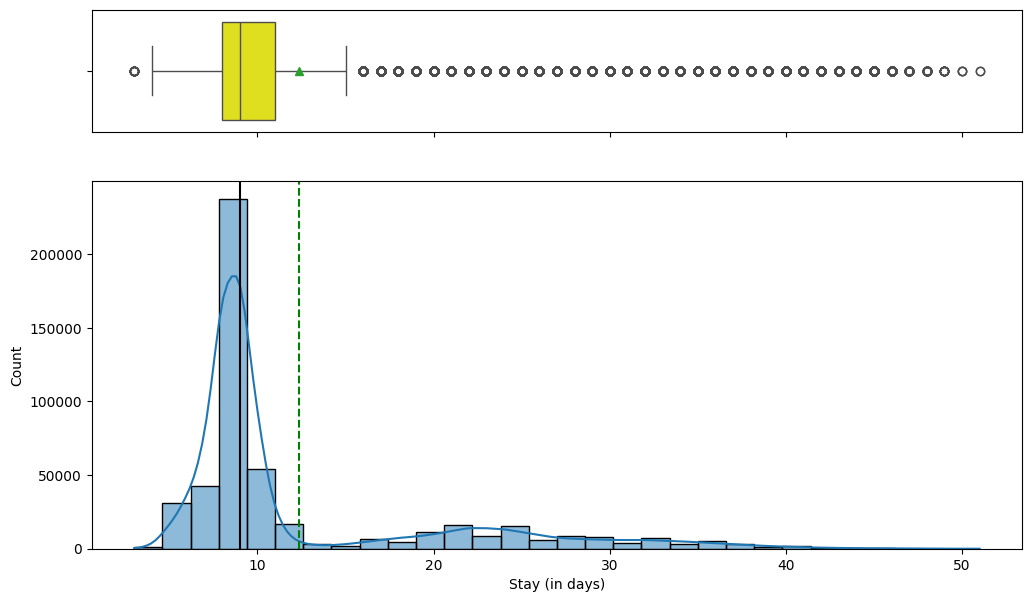

In [21]:
histogram_boxplot(data, "Stay (in days)", kde = True, bins = 30)

**Observations**:

- Fewer patients are staying more than 10 days in the hospital and very few stay for more than 40 days. This might be because the majority of patients are admitted for moderate or minor illnesses.
- The peak of the distribution shows that most of the patients stay for 8-9 days in the hospital.

#### **Admission Deposit**

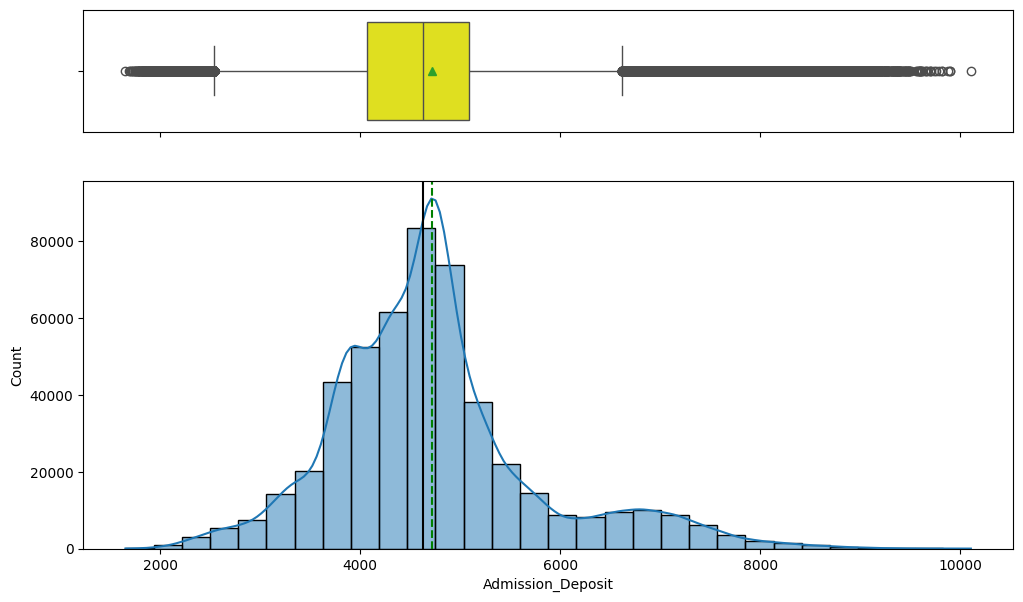

In [22]:
histogram_boxplot(data, "Admission_Deposit", kde = True, bins = 30)

**Observation**:

- The distribution of admission fees is close to normal with outliers on both sides. Few patients are paying a high amount of admission fees and few patients are paying a low amount of admission fees.

#### **Visitors with Patients**

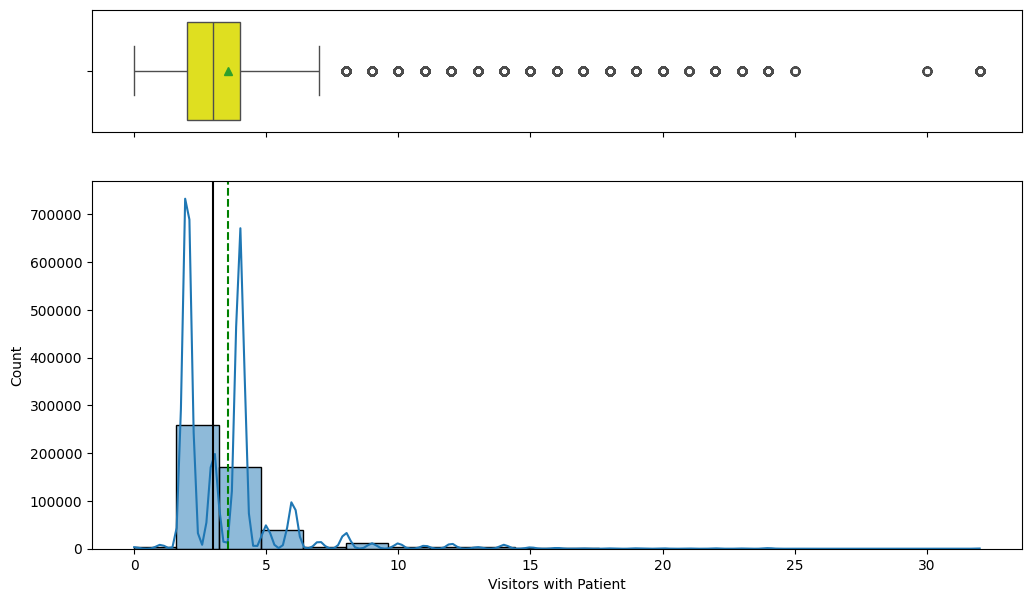

In [23]:
histogram_boxplot(data, "Visitors with Patient", kde = True, bins = 20)

**Observations**:

- The distribution of the number of visitors with the patient is highly skewed towards the right.
- 2 and 4 are the most common number of visitors with patients.

### **Bivariate Analysis**

Bivariate analysis is a statistical method used to explore the relationship between two variables. This type of analysis helps to understand how one variable changes in relation to another, which is crucial in identifying patterns, trends, and potential causal relationships.

In [24]:
# Selecting numerical variables only.
numeric_data = data.select_dtypes(include=['float64', 'int64'])

<Axes: >

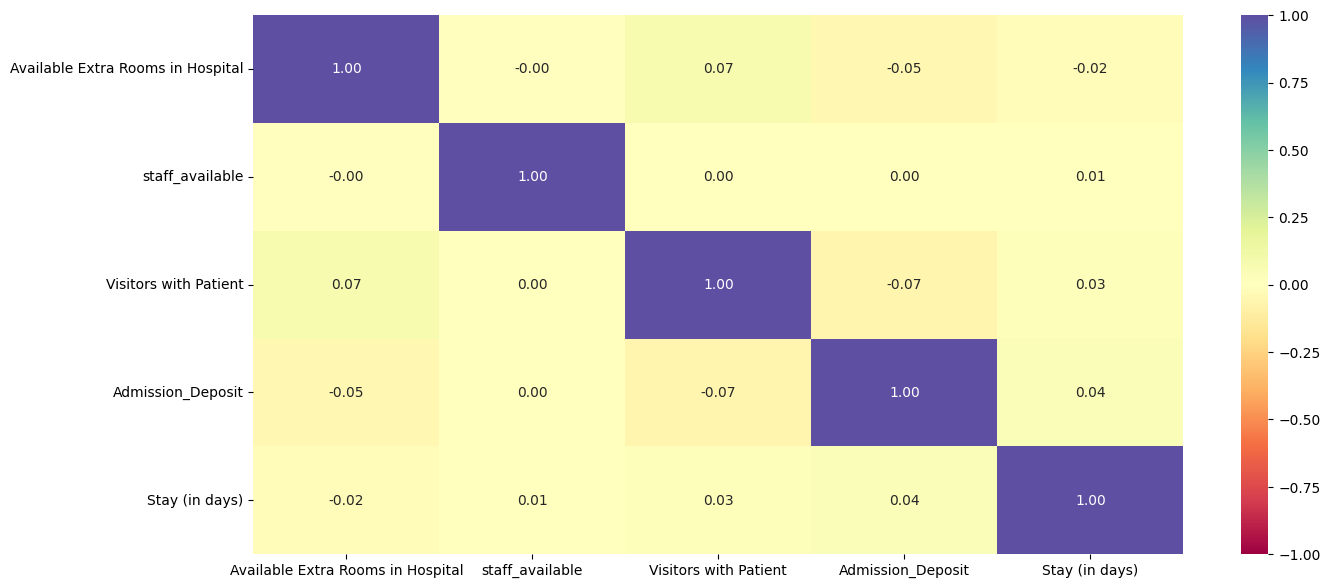

In [25]:
# Finding the correlation between various columns of the dataset
plt.figure(figsize = (15,7))
sns.heatmap(numeric_data.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

**Observations:**
- The heat map shows that the correlations between the variables are low.
- The continuous variables show low correlations with the target variable (Stay (in days)). In any case, the multivariate analysis can tell a different story. Furthermore,  categorical variables might be  important for prediction.

### Bar plots

We will first crete a function to produce stacked bar plots.

In [26]:
# Function to plot stacked bar plots

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(
        by = sorter, ascending = False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize = "index").sort_values(
        by = sorter, ascending = False
    )
    tab.plot(kind = "bar", stacked = True, figsize = (count + 1, 5))
    plt.legend(
        loc = "lower left",
        frameon = False,
    )
    plt.legend(loc = "upper left", bbox_to_anchor = (1, 1))
    plt.show()

Let's start by checking the distribution of the LOS for the various wards.

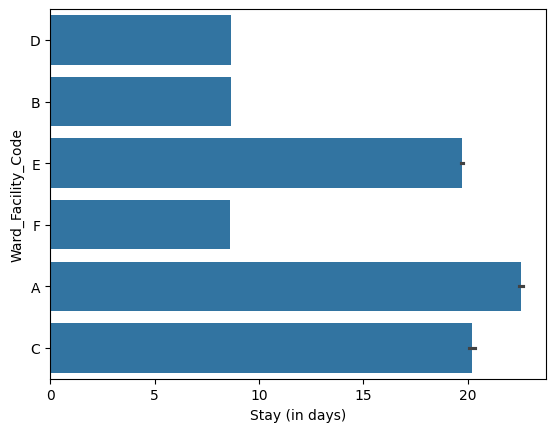

In [27]:
sns.barplot(y = 'Ward_Facility_Code', x = 'Stay (in days)', data = data)
plt.show()

**Observation:**

- The hypothesis we made earlier is correct, i.e., **wards A and C has the patients staying for the longest duration, which implies these wards might be for patients with serious illnesses.**

An ordered plot is easier to visualize and draw insights from.  We do that next.

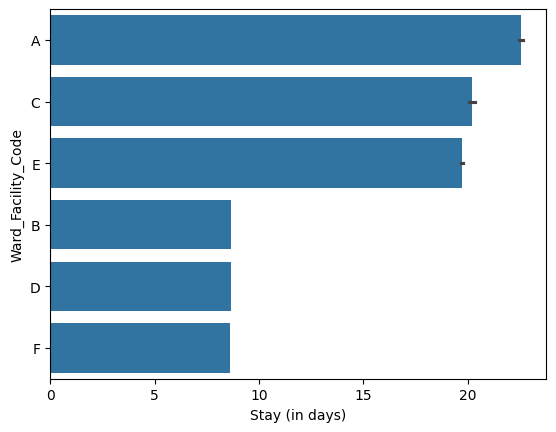

In [28]:
# Calculate mean stay for each Ward_Facility_Code
mean_stays = data.groupby('Ward_Facility_Code')['Stay (in days)'].mean().reset_index()

# Sort the mean stays in descending order
mean_stays_sorted = mean_stays.sort_values('Stay (in days)', ascending=False)

# Now, use the sorted Ward_Facility_Codes for the order parameter in sns.barplot
sns.barplot(y='Ward_Facility_Code', x='Stay (in days)', data=data, 
            order=mean_stays_sorted['Ward_Facility_Code'])

plt.show()

What is the *reset_index()* doing?

In [29]:
print(mean_stays_sorted )

  Ward_Facility_Code  Stay (in days)
0                  A       22.529033
2                  C       20.202576
4                  E       19.718351
1                  B        8.660365
3                  D        8.645399
5                  F        8.605643


Stacked bar plots are a type of data visualization that helps in comparing the total amount of a quantity across different categories, as well as understanding the distribution of sub-categories within each main category. 

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  \
Ward_Facility_Code                                                             
A                                 4709       15611           0         21093   
All                              22890       44179      343478         84315   
B                                    0           0      103885             0   
C                                 1319        4199           0          9079   
D                                    0           0      119055             0   
E                                16862       24369           0         54143   
F                                    0           0      120538             0   

Department          surgery     All  
Ward_Facility_Code                   
A                      5138   46551  
All                    5138  500000  
B                         0  103885  
C                         0   14597  
D                         0  119055  
E            

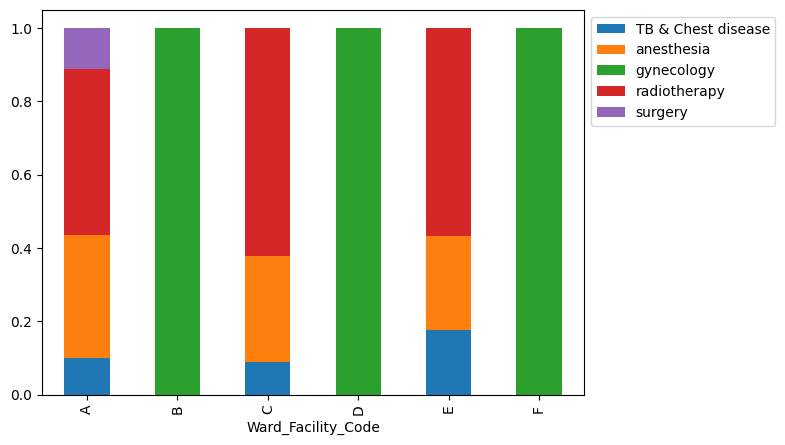

In [30]:
stacked_barplot(data, predictor="Ward_Facility_Code", target="Department")

**Observations**:

- Ward Facility B, D, and F are dedicated only to the gynecology department.
- Wards A, C, and E have patients with all other diseases, and patients undergoing surgery are admitted to ward A only.


Usually, the more severe the illness, the more the LOS. Let's check the distribution of severe patients in various wards.

Severity of Illness  Extreme   Minor  Moderate     All
Ward_Facility_Code                                    
All                    88266  131537    280197  500000
D                      29549   27220     62286  119055
B                      24222   23579     56084  103885
A                      13662    7877     25012   46551
E                      11488   22254     61632   95374
F                       5842   47594     67102  120538
C                       3503    3013      8081   14597
------------------------------------------------------------------------------------------------------------------------


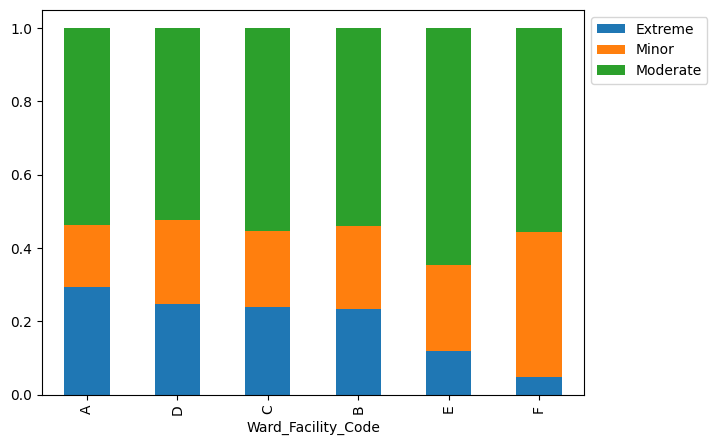

In [31]:
stacked_barplot(data, "Ward_Facility_Code", "Severity of Illness")

**Observations**:

- Ward A has the highest number of extreme cases. We observed earlier that ward A has the longest length of stay in the hospital as well. It might require more staff and resources as compared to other wards.
- Ward F has the highest number of minor cases and Ward E has the highest number of moderate cases.

Age can also be an important factor to find the length of stay. 

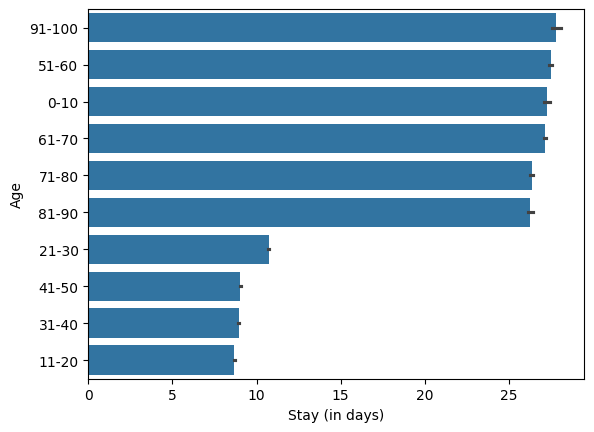

In [32]:
# Calculate mean stay for each Age
mean_stays = data.groupby('Age')['Stay (in days)'].mean().reset_index()

# Sort the mean stays in descending order
mean_stays_sorted = mean_stays.sort_values('Stay (in days)', ascending=False)

# Now, use the sorted Ages for the order parameter in sns.barplot
sns.barplot(y='Age', x='Stay (in days)', data=data, 
            order=mean_stays_sorted['Age'])

plt.show()

**Observation:**

- Patients aged between 1-10 and 91-100 tend to stay the most number of days in the hospital. This might be because the majority of the patients between the 21-50 age group get admitted to the gynecology department and patients in age groups 1-10 and 5-100 might get admitted due to some serious illness.

Department  TB & Chest disease  anesthesia  gynecology  radiotherapy  surgery  \
Age                                                                             
All                      22890       44179      343478         84315     5138   
31-40                     4413        9105       99251         19663      941   
61-70                     4854        8642           0         12159      901   
71-80                     2364        4473           0         11028      838   
51-60                     2361        8253           0         10405      699   
81-90                      776        1475           0          5264      666   
41-50                     4228        6133       56766         12739      540   
21-30                     2329        4818      140925         11241      480   
0-10                       908         913           0          1483       64   
91-100                     657         367           0           333        9   
11-20                       

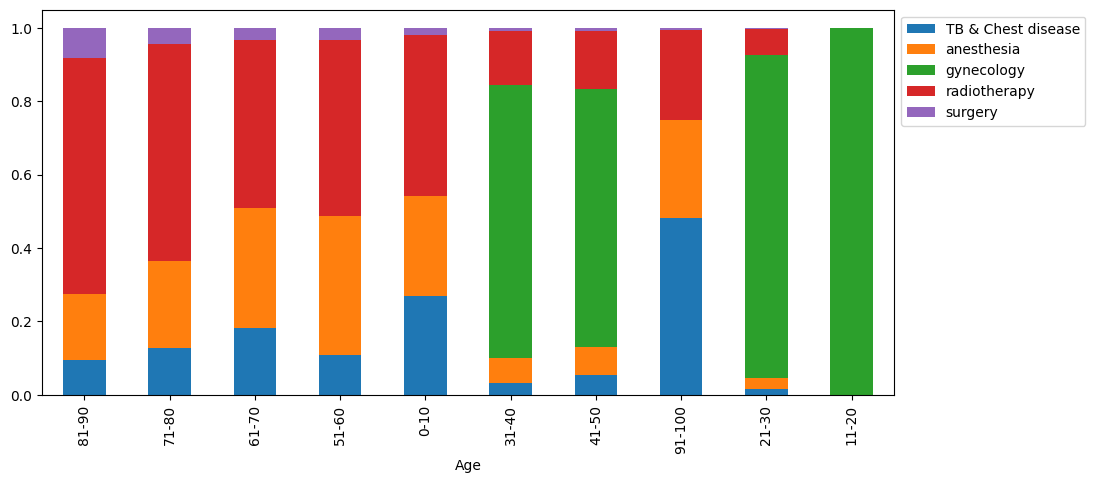

In [33]:
stacked_barplot(data, predictor="Age", target="Department")

-----

### **Relative Importance of Departments and Physicians**

Let's look at the doctors, their department names, and the total number of patients they have treated.

In [34]:
data.groupby(['doctor_name'])['Department'].agg(Department_Name='unique',Patients_Treated='count').sort_values('Patients_Treated', ascending=False)


,Department_Name,Patients_Treated
doctor_name,,
Dr Sarah,[gynecology],99596
Dr Olivia,[gynecology],98352
Dr Sophia,[gynecology],74753
Dr Nathan,[gynecology],70777
Dr Sam,[radiotherapy],55711
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr Isaac,[surgery],3359
Dr Simon,[surgery],1779


**Observations:**

- The hospital employs a total of 9 doctors. Four of the doctors work in the department of gynecology, which sees the most patients.
- The majority of patients that attended the hospital were treated by Dr. Sarah and Olivia.
- Two doctors are working in the surgical department (Dr. Isaac and Dr. Simon), while Dr. Sam works in the radiotherapy department.
- The only two doctors who work in several departments are Dr. John and Dr. Mark.

-----


## **Data Preparation for Model Building**

Before we proceed to build a model (any model), we need to prepare our data:

- Encode categorical features.
- Separate the independent variables and dependent variables.
- Split the data into *train* and *test* to be able to evaluate the model that we train on the training data.

In [35]:
# Creating dummy variables for the categorical columns
# drop_first=True is used to avoid redundant variables
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In the context of creating dummy variables from a categorical variable in pandas, the option **drop_first=True** is used to avoid multicollinearity. Let's review the data after processing the categorical data. For example, what department was dropped?


In [36]:
data

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days),Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,doctor_name_Dr John,doctor_name_Dr Mark,doctor_name_Dr Nathan,doctor_name_Dr Olivia,doctor_name_Dr Sam,doctor_name_Dr Sarah,doctor_name_Dr Simon,doctor_name_Dr Sophia,Age_11-20,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-90,Age_91-100,gender_Male,gender_Other,Type of Admission_Trauma,Type of Admission_Urgent,Severity of Illness_Minor,Severity of Illness_Moderate,health_conditions_Diabetes,health_conditions_Heart disease,health_conditions_High Blood Pressure,health_conditions_Other,Insurance_Yes
0,4,0,4,2966.408696,8,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
1,4,2,2,3554.835677,9,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False
2,2,8,2,5624.733654,7,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True
3,4,7,4,4814.149231,8,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4,2,10,2,5169.269637,34,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,2,3,4105.795901,10,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False
499996,13,8,2,4631.550257,11,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
499997,2,3,2,5456.930075,8,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
499998,2,1,2,4694.127772,23,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False


We next separate independent variables and the target variable:

In [37]:
x = data.drop('Stay (in days)',axis=1)
y = data['Stay (in days)']

In [38]:
print(x.dtypes)

Available Extra Rooms in Hospital          int64
staff_available                            int64
Visitors with Patient                      int64
Admission_Deposit                        float64
Department_anesthesia                       bool
Department_gynecology                       bool
Department_radiotherapy                     bool
Department_surgery                          bool
Ward_Facility_Code_B                        bool
Ward_Facility_Code_C                        bool
Ward_Facility_Code_D                        bool
Ward_Facility_Code_E                        bool
Ward_Facility_Code_F                        bool
doctor_name_Dr John                         bool
doctor_name_Dr Mark                         bool
doctor_name_Dr Nathan                       bool
doctor_name_Dr Olivia                       bool
doctor_name_Dr Sam                          bool
doctor_name_Dr Sarah                        bool
doctor_name_Dr Simon                        bool
doctor_name_Dr Sophi

We will identify boolean columns and convert them to integers.

In [39]:
bool_cols = x.select_dtypes(include='bool').columns
x[bool_cols] = x[bool_cols].astype(int)

In [40]:
print(x.dtypes)

Available Extra Rooms in Hospital          int64
staff_available                            int64
Visitors with Patient                      int64
Admission_Deposit                        float64
Department_anesthesia                      int32
Department_gynecology                      int32
Department_radiotherapy                    int32
Department_surgery                         int32
Ward_Facility_Code_B                       int32
Ward_Facility_Code_C                       int32
Ward_Facility_Code_D                       int32
Ward_Facility_Code_E                       int32
Ward_Facility_Code_F                       int32
doctor_name_Dr John                        int32
doctor_name_Dr Mark                        int32
doctor_name_Dr Nathan                      int32
doctor_name_Dr Olivia                      int32
doctor_name_Dr Sam                         int32
doctor_name_Dr Sarah                       int32
doctor_name_Dr Simon                       int32
doctor_name_Dr Sophi

We will use the **train_test_split** function from the *sklearn.model_selection* module of *scikit-learn*, a popular machine learning library in Python. This function is commonly used to split a dataset into random train and test subsets, which is a crucial step in the machine learning workflow for evaluating the performance of algorithms on unseen data (https://scikit-learn.org/stable/)


![alt text](image.png)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

**Observations:**

- **shuffle=True**: This parameter controls whether or not to shuffle the data before splitting. If set to True, the data will be randomly shuffled before being split into training and testing sets. This is important for ensuring that the data is randomly distributed, preventing any potential bias in the split.

- **random_state=1**: The random_state parameter is used for initializing the internal random number generator, which will decide the splitting of data into training and testing sets. Providing any integer value (such as 1) ensures that the results are reproducible. In other words, using the same random_state will produce the same split each time the code is run, which is useful for debugging or for scientific reproducibility.

In [42]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (400000, 41)
Shape of test set :  (100000, 41)


---

##  **Metrics for Model Evaluation**

- We will use different metrics functions defined in sklearn, like RMSE, MAE, 𝑅2, Adjusted 𝑅2, and MAPE for regression models evaluation. 
- These are common metrics used in statistics and machine learning to evaluate the performance of regression models. Each metric gives a different perspective on the model's accuracy and reliability.


### **Root Mean Square Error (RMSE)**

* The RMSE measures the square root of the average of the squares of the errors. The error is the difference between the actual values and the predicted values from a model. 
* RMSE is sensitive to outliers. 
* The lower the RMSE, the better the model's performance.

* $\text{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$




### **Mean Absolute Error (MAE)**

* The MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. 
* It's the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.
*  It's less sensitive to outliers compared to RMSE.

* $\text{MAE} = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$

### **R-squared (𝑅²)**

* 𝑅², also known as the **coefficient of determination**, represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. 
* It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.
*  It is a statistical measure of how close the data are to the fitted regression line. 
* 𝑅² is a value between 0 and 1, where 1 indicates perfect prediction.

* $R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$

### **Adjusted R-squared**

* This measure adjusts the R² statistic based on the number of predictors in the model, penalizing for adding predictors that do not improve the model.
* Unlike R², which always increases as you add more predictors, the Adjusted R² increases only if the new term improves the model more than would be expected by chance. 
* It's useful for comparing models with a different number of predictors. A higher Adjusted R² indicates a model with a better balance between fit and complexity.

* $\text{Adjusted } R^2 = 1 - \left(\frac{(1-R^2)(n-1)}{n-p-1}\right)$

### **Mean Absolute Percentage Error (MAPE)**
* Measures the size of the error in percentage terms. 
* It is calculated as the average of the absolute percentage errors of predictions.

* $\text{MAPE} = \frac{100\%}{n}\sum_{i=1}^{n}\left|\frac{y_i - \hat{y}_i}{y_i}\right|$

### **Function to Compute Metrics for Model Evaluation**

In [43]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

---

## **The Linear Regression Model: Quick Review**

The Linear Regression Model (LRM) is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. The linear equation predicts the dependent variable as a function of the independent variables. The simplest form of linear regression is simple linear regression, which involves a single independent variable (https://online.stat.psu.edu/stat462/node/79/). In contrast, multiple linear regression involves two or more independent variables.

The linear regression model can be represented as follows for a simple linear regression:

$$
Y_i = \beta_0 + \beta_1X_i + \epsilon_i
$$

where:
- $Y_i$ is the dependent variable,
- $X_i$ is the independent variable,
- $\beta_0$ is the y-intercept,
- $\beta_1$ is the slope of the line, and
- $\epsilon_i$ is the error term for the \(i\)-th observation.

For multiple linear regression, the equation is extended to include more terms:

$$
Y_i = \beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + \ldots + \beta_kX_{ik} + \epsilon_i
$$

where $X_{ij}$ represents the $j$-th independent variable for the $i$-th observation, and *k* is the number of independent variables.

The formulas for estimating the coefficients $\beta_0$ (intercept) and $\beta_1$ (slope) are derived from the least squares criterion (https://are.berkeley.edu/courses/EEP118/current/derive_ols.pdf). The least squares criterion aims to minimize the sum of the squared differences between the observed values and the values predicted by the model.

The formulas for $\beta_1$ and $beta_0$ are:

$$
\beta_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2}
$$

where $\bar{X}$ and $\bar{Y}$ are the mean values of $X$ and $Y$ respectively, and $n$ is the number of observations.

Once $\beta_1$ is calculated,$\beta_0$ can be found using the formula:

$$
\beta_0 = \bar{Y} - \beta_1\bar{X}
$$

The multiple regression model in matrix notation can be compactly represented as:

$$
\mathbf{Y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}
$$

where:
- $ \mathbf{Y} $ is an $ n \times 1$ matrix (vector) of the dependent variable observations,

- $ \mathbf{X} $ is an $ n \times k $ matrix of the independent variable observations, with the first column being a column of ones for the intercept term $( \beta_0 )$,

- $\boldsymbol{\beta}$ is a $ k \times 1 $ matrix (vector) of the regression coefficients, including the intercept term ($ \beta_0 $) and the slope coefficients ($ \beta_1, \beta_2, \ldots, \beta_{k-1} $),

- $\boldsymbol{\epsilon} $ is an $ n \times 1 $ matrix (vector) of the error terms.

The ordinary least squares (OLS) estimator of  $\boldsymbol{\beta}$ is given by (https://max.pm/posts/ols_matrix/):

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^{\text{T}}\mathbf{X})^{-1}\mathbf{X}^{\text{T}}\mathbf{Y}
$$

This equation calculates the estimated regression coefficients by minimizing the sum of the squared residuals.




## **Assumptions for Unbiasedness and Consistency**

For the estimates of the regression coefficients ($\beta$) to be unbiased and consistent, several key assumptions must be satisfied:

1. **Linearity**: The relationship between the dependent and independent variables is linear.

2. **Independence**: The observations are independent of each other.
3. **Homoscedasticity**: The variance of the error terms ($\epsilon_i$) is constant across all levels of the independent variables. This means that the spread or scatter of the dependent variable around the regression line is the same for all values of the independent variables.
4. **No perfect multicollinearity**: In the case of multiple regression, the independent variables should not be perfectly correlated with each other. This ensures that the independent variables provide unique and non-redundant information about the dependent variable.
5. **Exogeneity**: The error term ($\epsilon_i$) is uncorrelated with the independent variables. This means that the independent variables are not affected by the errors in the model.
6. **Normality of Errors (optional for large samples)**: For small sample sizes, it's assumed that the error terms are normally distributed to conduct hypothesis testing accurately. However, for large samples, the Central Limit Theorem ensures that the sampling distribution of the regression coefficients is approximately normal, making this assumption less critical for unbiasedness and consistency but still relevant for inference (e.g., t-tests, F-tests).

When these assumptions are met, the ordinary least squares (OLS) estimator is the Best Linear Unbiased Estimator (BLUE), providing the most reliable estimates of the regression coefficients that are both unbiased (on average, the estimated coefficients equal the true coefficients) and consistent (as the sample size increases, the estimates converge to the true values).

---



## **OLS Estimation in Python**


We will import the *statsmodels.api*. This library is particularly useful for linear models, generalized linear models, robust linear models, and many other statistical tests and explorations.

In [44]:
import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
x_train1 = sm.add_constant(x_train)

# Add constant to test data
x_test1 = sm.add_constant(x_test)


### **Training the Model**

We first train the model:

In [45]:
# Train the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 5.796e+04
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:13:06   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399962   BIC:                         2.050e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

**Observations:**

- Not all the variables are statistically significant  to predict the outcome variable. To check which ones are statistically significant or have enough predictive power to predict the target variable, we check the `p-value` of the `t-tests` for all the independent variables. Independent variables with a p-value of 0.05 or higher are not significant at the 95% confidence level.

* Both the **R-squared and Adjusted R-squared of the model are around 84%**. This is a clear indication that we have been able to create a good model that can explain variance in the LOS of patients for up to 84%.

* We can examine the significance of the regression model, and try dropping insignificant variables.

### **Predicted Values versus Actual Values**

Plotting predicted values against actual values is an excellent way to visually assess the performance of the regression model. This comparison can reveal how well the model's predictions align with the actual data. 

To make predictions with the fitted model, we can use **predict**:

In [46]:
predictions = olsmodel1.predict(x_train1)  

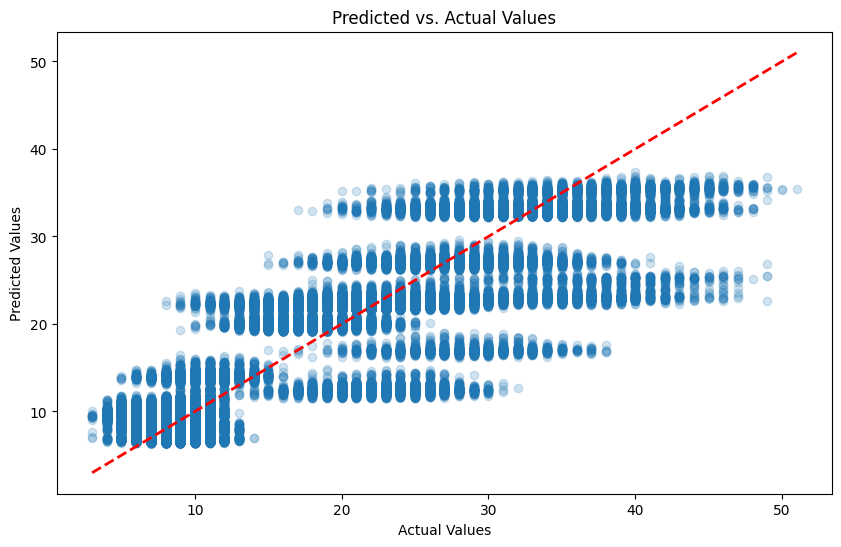

In [47]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(y_train, predictions, alpha=0.2)  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Diagonal line
plt.show()

---
## **Performance of the Model in the Train Data and in the Test Data**

Let's check the performance of the model on the train data:

In [48]:
print("Performance on train data: ")
model_performance_regression(olsmodel1, x_train1, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135093,2.146244,0.842813,0.842796,19.591833


Let's check the performance of the model on the test data:

In [49]:
print("Performance on test data: ")
model_performance_regression(olsmodel1, x_test1, y_test)

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144055,2.155765,0.843028,0.842962,19.676966


**Observations**:

- The Root Mean Squared Error of train and test data are very close, indicating that our model is not overfitting to the training data.

- Mean Absolute Error (MAE) indicates that the current model can predict LOS of patients within mean error of 2.15 days on the test data.

- The units of both RMSE and MAE are the same - days in this case. But RMSE is greater than MAE because it penalizes the outliers more.

- Mean Absolute Percentage Error is ~20% on the test data, indicating that the average difference between the predicted value and the actual value is ~20%.

---

## **Multicollinearity**

Multicollinearity occurs when independent variables in a regression model are highly correlated to each other, such that they do not provide unique or independent information. A regression coefficient is interpreted as the mean change in the target for each unit change in a feature when all other characteristics are held constant. Changes in one aspect can affect other features when they are correlated. The stronger the relationship, the more difficult it is to change one element without affecting the others. Because the features tend to change concurrently, it becomes difficult for the model to evaluate the link between each variable and the target individually.

**Variation Inflation Factor** (VIF) is one of the most common ways of detecting multicollinearity in data. The VIF calculates how much the variance of a regression coefficient is inflated due to model multicollinearity (https://online.stat.psu.edu/stat462/node/180/).

The VIF can be calculated in two steps,
*   Suppose there are three independent variables $X_1$, $X_2$, and $X_3$, and a target variable Y. If we wish to calculate VIF for the variable $X_1$, we run the regression of  $X_1$ on $X_2$ and $X_3$.

* The  R2 squared from the above regression is used in the formula below to calculate the VIF for $X_1$ ($i=1$).

* $VIF_i=\frac{1}{1-R^2_i}$


Variance inflation factor (VIFs) tells "what percentage of the variance is inflated for each coefficient". For example, a VIF of 1.7 tells you that the variance of a particular coefficient is 70% bigger than what you would expect if there was no multicollinearity, i.e., if there was no correlation with other predictors.

The general rule of thumb is that VIFs exceeding 4 warrant further investigation, while VIFs exceeding 10 are signs of serious multicollinearity requiring correction.

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


In [51]:
print(checking_vif(x_train1.select_dtypes(include=['int64', 'float64'])))

                             feature        VIF
0                              const  29.591506
1  Available Extra Rooms in Hospital   1.007079
2                    staff_available   1.000007
3              Visitors with Patient   1.009249
4                  Admission_Deposit   1.006892


- All the **continuous** variables have VIF less than 5, which makes sense according to what we observed in correlation heatmap.

**Note:** It is not a good practice to consider VIF values for dummy variables because they are correlated with other categories and therefore usually have a high VIF.

---


## **Model Selection**

It is not enough to just fit a multiple regression model to the data, it is also necessary to check whether all the regression coefficients are significant or not. The significance here means whether the population regression parameters are significantly different from zero.

### **Dropping the insignificant variables and creating the regression model again**



From the above results, it may be noted that the regression coefficients corresponding to staff_available, Visitors with Patient, and Insurance_Yes are not statistically significant at significance level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population.

Suppose you have a nominal categorical variable having 4 categories (or levels). You would create 3 dummy variables (k-1 = 4-1 dummy variables) and set one category as a reference level. Suppose one of them is insignificant, then if you exclude that dummy variable, it would change the reference level as you are indirectly combining that insignificant level with the original reference level. It would have a new reference level and interpretation would change. Moreover, excluding the level may make the others insignificant. If all the categories in a column show p-value higher than 0.05, then we can drop that column.

Hence, we will eliminate these three features and create a new model.

In [52]:
# Dropping variables
x_train2 = x_train1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis = 1)
x_test2 = x_test1.drop(['Insurance_Yes','staff_available','Visitors with Patient'], axis = 1)

# Train the model
olsmodel2 = sm.OLS(y_train, x_train2).fit()

# Get the model summary
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 6.307e+04
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:13:08   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399965   BIC:                         2.050e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8886      0.053    373.758      0.000      19.784      19.993
Available Extra Rooms in Hospital         0.0786      0.002     42.391      0.000       0.075       0.082
Admission_Deposit                     -3.842e-05   4.77e-06     -8.051      0.000   -4.78e-05   -2.91e-05
Department_anesthesia                     6.0822      0.029    210.152      0.000       6.025       6.139
Department_gynecology                     0.4628      0.019     24.518      0.000       0.426       0.500
Department_radiotherapy                  -4.6217      0.037   -126.175      0.000      -4.694      -4.550
Department_surgery                        9.6854      0.044    218.982      0.000       9.599       9.772
Ward_Facility_Code_B                      0.2569      0.011     23.599      0.000       0.236       0.278
Ward_Facility_Code_C                      0.4350      0.034     12.611      0.000       0.367       0.503
Ward_Facility_Code_D                      0.2032      0.010     19.495      0.000       0.183       0.224
Ward_Facility_Code_E                      0.3085      0.021     14.438      0.000       0.267       0.350
Ward_Facility_Code_F                      0.0027      0.011      0.248      0.804      -0.019       0.024
doctor_name_Dr John                       7.2624      0.031    236.018      0.000       7.202       7.323
doctor_name_Dr Mark                       1.1947      0.033     36.462      0.000       1.130       1.259
doctor_name_Dr Nathan                    -0.2125      0.015    -14.014      0.000      -0.242      -0.183
doctor_name_Dr Olivia                    -0.3592      0.015    -24.646      0.000      -0.388      -0.331
doctor_name_Dr Sam                        1.2833      0.038     33.914      0.000       1.209       1.358
doctor_name_Dr Sarah                      0.8184      0.016     50.617      0.000       0.787       0.850
doctor_name_Dr Simon                      6.1594      0.069     89.118      0.000       6.024       6.295
doctor_name_Dr Sophia                     0.2162      0.020     10.584      0.000       0.176       0.256
Age_11-20                               -12.7379      0.065   -194.593      0.000     -12.866     -12.610
Age_21-30                               -10.4831      0.062   -168.470      0.000     -10.605     -10.361
Age_31-40                               -13.4355      0.062   -216.959      0.000     -13.557     -13.314
Age_41-50                               -13.5114      0.062   -216.835      0.000     -13.634     -13.389
Age_51-60                                -0.3666      0.065     -5.652      0.000      -0.494      -0.239
Age_61-70                                -0.4217      0.064     -6.592      0.000      -0.547      -0.296
Age_71-80

###  **Checking the performance of the model on the train and test datasets**

In [53]:
print("Performance on train data: ")
model_performance_regression(olsmodel2, x_train2, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.135098,2.146237,0.842812,0.842797,19.591701


In [54]:
print("Performance on test data: ")
lin_reg_test = model_performance_regression(olsmodel2, x_test2, y_test)
lin_reg_test

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.144053,2.155762,0.843028,0.842967,19.676967


Observation:

* RMSE, MAE, and MAPE of train and test data are very close, indicating that the model is not overfitting and has generalized well over the unseen data.

---


## **Checking Key Assumptions and Rebuilding the Model**

In this step, we will check for the below assumptions in the model, to verify if they hold true or not. If the assumptions of model are not satisfied, then the model might give false results. Hence, if any of the assumptions is not true, then we will rebuild the model after fixing those issues.


1. Normality of error terms
2. Linearity of variables
3. No Heteroscedasticity

###  **Normality**


* Error terms/Residuals should be normally distributed.

* The assumption of normality of the error term in linear regression models is crucial for several aspects of model inference and interpretation, especially when the sample size is small. However, it's important to note that the normality assumption primarily affects inference (e.g., hypothesis testing, confidence intervals) rather than the estimation of regression coefficients (point estimation).



### **Consequences of Non-normality**

The normality assumption underpins the derivation of exact sampling distributions for test statistics used in hypothesis tests (e.g., t-tests for coefficients) and the construction of confidence intervals. When errors are not normally distributed:

* The test statistics may not follow a t-distribution, which can lead to inaccurate p-values and, consequently, incorrect inferences about the significance of predictors.

* Confidence intervals for the regression coefficients may not be accurate, affecting the reliability of the interval estimates.

* While the least squares estimates (the coefficients of the regression model) are still unbiased in the presence of non-normal errors, the efficiency of these estimates may be compromised. That is, they may not have the smallest possible variance among all unbiased estimators, especially if the errors exhibit heteroskedasticity (non-constant variance) or are significantly skewed.

* For large sample sizes, the **Central Limit Theorem** (CLT) provides some relief regarding the normality assumption. The CLT suggests that, as the sample size grows, the sampling distribution of the regression coefficients will approximate a normal distribution, regardless of the error distribution. This property supports the validity of hypothesis testing and confidence intervals for large samples even if the error terms are not perfectly normal.

If significant deviations from normality are detected, remedial measures might include:

* Applying transformations to the dependent variable, independent variables, or both.

* Considering non-parametric regression methods (e.g., Random Forest and other ensamble methods) or generalized linear models (GLMs) as alternatives, which do not rely on the assumption of normally distributed errors.

### **Testing for Normality**

To start, let's examine the residuals histogram with the normal distribution plot overlaid. We can easily obtain the residuals of the model:

In [55]:
residuals = olsmodel2.resid
type(residuals)

pandas.core.series.Series

#### **Histogram**

To plot the histogram and the corresponding normal curve for a series of residuals, we would typically use libraries like Matplotlib for plotting and *SciPy* to calculate the normal distribution curve (https://scipy.org/).

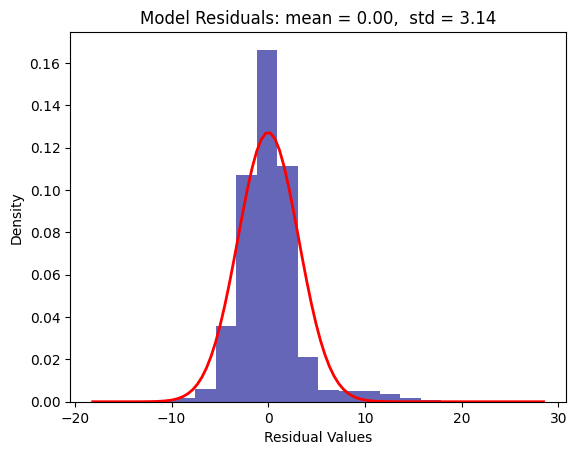

In [56]:
from scipy.stats import norm

# Calculate the mean and standard deviation of your series

mean = np.mean(residuals)
std_dev = np.std(residuals)

# Create the histogram of the residuals
plt.hist(residuals, bins=20, density=True, alpha=0.6, color='darkblue')

# Generate points on the x axis:
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# Calculate the normal distribution values for each x
p = norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve
plt.plot(x, p, 'r', linewidth=2)

title = "Model Residuals: mean = %.2f,  std = %.2f" % (mean, std_dev)

plt.title(title)
plt.xlabel('Residual Values')
plt.ylabel('Density')
plt.show()

What do you think? Are the residuals normally distributed? 

In [57]:

from scipy.stats import skew, kurtosis

# Assuming you have your residuals in a pandas Series
# residuals = pd.Series(...)

# Descriptive statistics
descriptive_stats = residuals.describe()

# Bias - mean of residuals
bias = residuals.mean()

# Skewness - measure of asymmetry
skewness = skew(residuals, bias=False)  # bias=False for unbiased estimation

# Kurtosis - measure of the "tailedness" of the distribution
kurt = kurtosis(residuals, bias=False)  # bias=False for unbiased estimation

# Printing the statistics
print("Descriptive Statistics:\n", descriptive_stats)
print("Bias (Mean of Residuals):", bias)
print("Skewness:", skewness)
print("Kurtosis:", kurt)


Descriptive Statistics:
 count    4.000000e+05
mean     1.469230e-13
std      3.135102e+00
min     -1.603673e+01
25%     -1.822545e+00
50%     -1.576032e-01
75%      1.244197e+00
max      2.634889e+01
dtype: float64
Bias (Mean of Residuals): 1.4692304262098332e-13
Skewness: 1.4952590003778172
Kurtosis: 5.796122020669237


**Observations:**

* The mean of residuals, also known as `bias`, is expected to be close to 0 since this condition is enforced during the OLS minimization problem. 

* `Skewness` measures the asymmetry of the probability distribution of a real-valued random variable. A skewness value of 0 indicates a symmetric distribution. The obtained value of approximately 1.5 suggests a distribution that is skewed to the right (positive skewness), meaning there are more smaller residuals and fewer large residuals, deviating from the symmetric normal distribution. 

* The `kurtosis` statistic measures the 'tailedness' of the distribution, with a kurtosis of 3 indicating a normal distribution (mesokurtic). Our value of 5.8 indicates a leptokurtic distribution. This indicates that the distribution has more extreme values and a more pronounced central point than the normal distribution, suggesting a greater probability of outliers.

#### **QQ Plots**

Quantile-Quantile (QQ) plots (https://www.ibm.com/docs/es/spss-statistics/beta?topic=types-q-q-plots) are graphical tools used to assess if a dataset follows a certain theoretical distribution such as the normal distribution. They are particularly useful for visually determining if your data deviate from a normal distribution, which is a common assumption for many statistical tests.

A QQ plot compares the quantiles of a dataset against the quantiles of a theoretical distribution. The x-axis displays the theoretical quantiles of the distribution being tested against (often the normal distribution), and the y-axis displays the quantiles from the dataset. If the data follow the theoretical distribution, the points on the QQ plot will approximately lie on a straight line.



#### **How to Interpret a QQ Plot**

- **Points lie on or near a straight diagonal line**: This suggests that the data follow the theoretical distribution closely.
- **Points deviate in a systematic way from the line**: This indicates that the data may not fit the distribution being tested. For instance:
  - If the points form a curve that is concave up, this suggests that the data have a heavier tail than the normal distribution (positive skewness).
  - If the points form a concave down curve, this suggests that the data have a lighter tail than the normal distribution (negative skewness).
  - If the points diverge from the line at the ends, the data may have heavier tails than the normal distribution (leptokurtic).

  Let's examine a QQ plot for a random variable that follows a normal distribution.






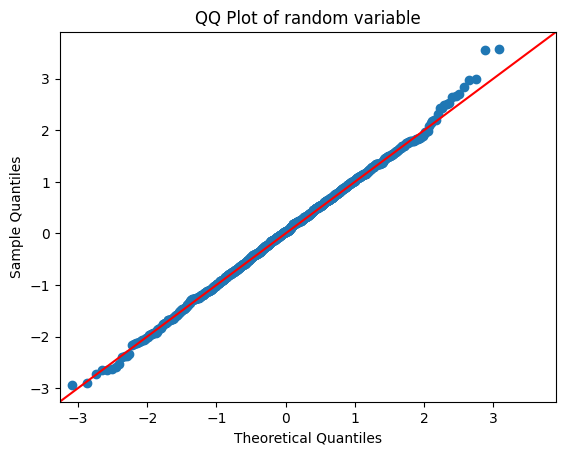

In [58]:
rv = np.random.normal(0, 1, 1000)  # Variable generated for illustration

# Create the QQ plot
fig = sm.qqplot(rv, line='45')  # The 'line' parameter adds a reference line to the plot for comparison
plt.title('QQ Plot of random variable')
plt.show()

For the case of the residuals of the model:

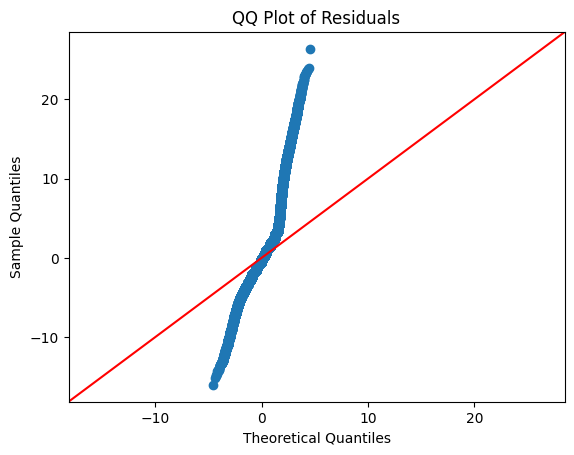

In [59]:
fig = sm.qqplot(residuals, line='45')
plt.title('QQ Plot of Residuals')
plt.show()

#### **The Jarque-Bera Test**

The Jarque-Bera test (https://dataaspirant.com/jarque-bera-test/) is a statistical test that is used to test the assumption of normality, which is a common assumption for many statistical techniques. The test is based on the sample skewness and kurtosis, and it is particularly suitable for large samples. The hypothesis statements for the test are as follows:

- Null hypothesis ($H_0$): The data follows a normal distribution.
- Alternative hypothesis ($H_a$): The data does not follow a normal distribution.

The Jarque-Bera test statistic ($JB$) is computed using the following equation:

$$
JB = n \left( \frac{S^2}{6} + \frac{(K - 3)^2}{24} \right)
$$

where:
- $n$ is the sample size,
- $S$ is the sample skewness,
- $K$ is the sample kurtosis.

The sample skewness ($S$) and kurtosis ($K$) are given by:

$$
S = \frac{\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^3}{\left(\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2\right)^{3/2}}
$$

$$
K = \frac{\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^4}{\left(\frac{1}{n} \sum_{i=1}^{n} (X_i - \bar{X})^2\right)^{2}}
$$

where:
- $X_i$ represents the observations,
- $\bar{X}$ is the sample mean.

The $JB$ statistic asymptotically follows a chi-square distribution with 2 degrees of freedom under the null hypothesis. Therefore, if the $JB$ statistic is significantly large, we reject the null hypothesis, indicating that the data do not follow a normal distribution.

This test has a limitation in that its power might be low for small sample sizes, making it less likely to detect deviations from normality. Therefore, it's more reliable when used with larger datasets.


In [60]:
from scipy.stats import jarque_bera

In [61]:
# Perform the Jarque-Bera test
jb_stat, p_value = jarque_bera(residuals)

print(f"Jarque-Bera statistic: {jb_stat}")
print(f"P-value: {p_value}")

Jarque-Bera statistic: 708952.4594833545
P-value: 0.0


#### **The Shapiro-Wilk Test**

The Shapiro-Wilk test (https://builtin.com/data-science/shapiro-wilk-test) is a statistical test that checks the hypothesis of normality for a given dataset. It is widely used to assess whether a set of data comes from a normally distributed population. The test is applicable for small to moderate sample sizes, typically considered to be effective for datasets with fewer than 50 observations, though it can still be used with larger samples up to a few hundred observations.

The Shapiro-Wilk test considers the following hypotheses:

- **Null Hypothesis ($H_0$)**: The sample data follows a normal distribution.
- **Alternative Hypothesis ($H_a$)**: The sample data does not follow a normal distribution.

The Shapiro-Wilk test statistic ($W$) is calculated as follows:

$$
W = \frac{(\sum_{i=1}^{n} a_i x_{(i)})^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

Here:
- $x_{(i)}$ denotes the $i$ th order statistic, i.e., the $i$ th smallest value in the sample.
- $\bar{x}$ is the sample mean.
- $a_i$ are coefficients generated from the covariances, variances, and means of the order statistics of a sample from a normal distribution. These coefficients depend on the sample size $n$ and are derived through a complex procedure, ensuring the test's sensitivity to deviations from normality.

**Interpretation:**

- A **high value** of $W$ (close to 1) indicates that the sample is likely to be normally distributed.
- A **low value** of $W$ suggests a deviation from normality.

The Shapiro-Wilk test provides a p-value, which is used to decide whether to reject the null hypothesis. If the p-value is less than the chosen significance level (commonly 0.05), the null hypothesis of normality is rejected, suggesting that the data do not come from a normally distributed population.

**Advantages and Limitations**

- **Advantages**: The Shapiro-Wilk test is known for its power and efficiency, particularly for small sample sizes, making it a preferred choice over other normality tests like the Kolmogorov-Smirnov test or the Anderson-Darling test for such datasets.
- **Limitations**: Its effectiveness diminishes with larger samples, and it may be too sensitive, detecting small deviations from normality that may not be relevant in practical situations.


In [62]:
from scipy.stats import shapiro


# Perform the Shapiro-Wilk test on the residuals
stat, p_value = shapiro(residuals)

# Output the results
print(f'Statistic: {stat:.4f}, P-value: {p_value:.4f}')

# Interpretation based on a default alpha of 0.05
alpha = 0.05
if p_value > alpha:
    print('The residuals appear to be normally distributed (fail to reject H0).')
else:
    print('The residuals do not appear to be normally distributed (reject H0).')


Statistic: 0.8896, P-value: 0.0000
The residuals do not appear to be normally distributed (reject H0).


---
###  **Linearity of Variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

#### Residual Plots


* Residual plots can be used to detect non-linearity. After fitting a linear regression model, we plot the residuals (the differences between the observed and predicted values) against the predicted values or against one of the independent variables.

*  Ideally, the residuals should be randomly dispersed around the horizontal axis (zero). Patterns or systematic structures in the plot indicate violations of the linearity assumption.

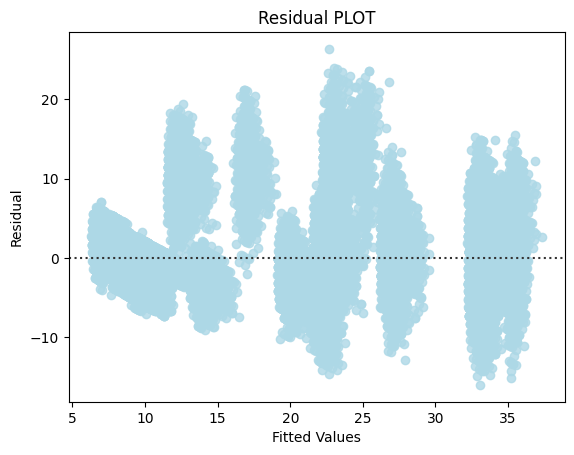

In [63]:
# Predicted values
fitted = olsmodel2.fittedvalues

# Plotting Residuals VS Fitted Values
sns.residplot(x = fitted, y = residuals, color="lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

The function *sns.residplot* creates a residual plot. 

**Observation:**

- We can observe that there is no pattern in the residuals vs fitted values scatter plot, i.e., the linearity assumption seems to be satisfied.

### **Homoscedasticity (No Heteroscedasticity)** 

Heteroskedasticity occurs when the variance of the error terms (residuals) is not constant across all levels of the independent variables. This characteristic can have significant implications for the regression analysis, affecting the reliability of some key statistical tests and the efficiency of the estimates.

#### Consequences

* While the Ordinary Least Squares (OLS) estimators remain unbiased in the presence of heteroskedasticity, they are no longer the Best Linear Unbiased Estimators (BLUE). 

* The standard errors of the OLS coefficients are usually underestimated in the presence of heteroskedasticity. This underestimation affects the reliability of hypothesis tests (e.g., t-tests) and confidence intervals for the coefficients. Consequently, the significance levels of the coefficients may be inaccurately estimated, leading to incorrect conclusions about the importance of variables.

#### Detecting Heteroskedasticity

* Plotting the residuals or the squared residuals against the fitted values or an independent variable can provide visual evidence of heteroskedasticity. A pattern or fan shape in the plot suggests varying variances.

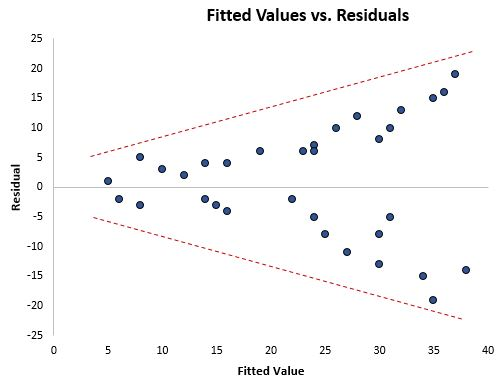

Source: https://www.statology.org/breusch-pagan-test/

We will plot the residuals of our model (and their squares) against the fitted values:

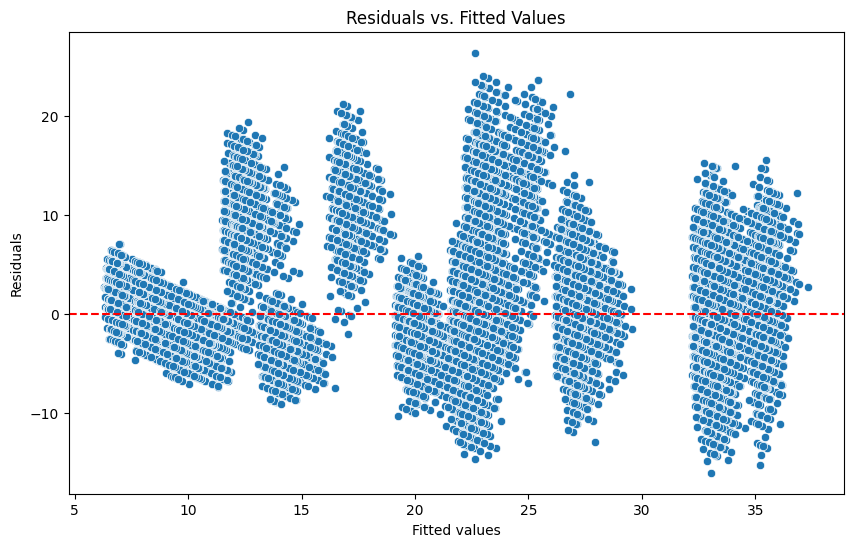

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


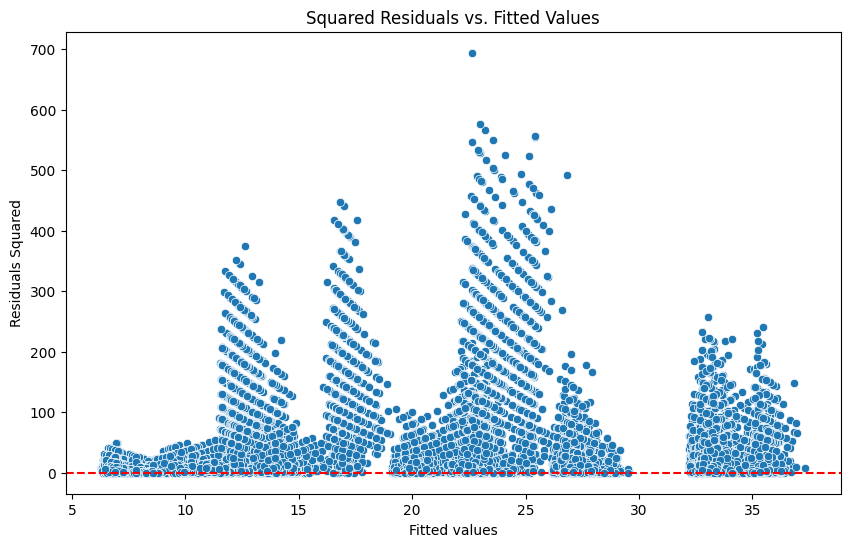

In [81]:
sq_res = residuals **2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted, y=sq_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals Squared')
plt.title('Squared Residuals vs. Fitted Values')
plt.show()

Several tests are available for detecting heteroskedasticity.


#### **Breusch-Pagan Test**

The Breusch-Pagan test (https://www.statology.org/breusch-pagan-test/) assesses the null hypothesis that the variance of the errors is constant against the alternative hypothesis that the variance is a function of the independent variables. The test involves the following steps:

1. **Fit the Regression Model**: First, fit the regression model to your data and compute the residuals. Suppose your model is

   $$
   Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_kX_k + \epsilon
   $$

   where $\epsilon$ represents the error term.

2. **Compute the Squared Residuals**: Calculate the squared residuals from the model. Let $\hat{\epsilon_i}^2$ be the squared residuals.

3. **Regression of Squared Residuals**: Perform a regression of the squared residuals on the independent variables (or a subset you suspect affects the variance of the errors). This regression is given by

   $$
   \hat{\epsilon_i}^2 = \gamma_0 + \gamma_1X_1 + \gamma_2X_2 + ... + \gamma_kX_k + u_i
   $$

4. **Test Statistic**: The test statistic for the Breusch-Pagan test is computed as follows:

   $$
   BP = \frac{R^2 \cdot n}{2}
   $$

   where $R^2$ is the coefficient of determination from the regression in step 3, and $n$ is the number of observations. This statistic follows a $\chi^2$ distribution with $k$ degrees of freedom, where $k$ is the number of independent variables included in the regression of step 3.

5. **Decision Rule**: Compare the computed $BP$ statistic to a critical value from the $\chi^2$ distribution with $k$ degrees of freedom at your chosen significance level. If the $BP$ statistic is greater than the critical value, you reject the null hypothesis of homoskedasticity (constant variance), indicating the presence of heteroskedasticity.


In [117]:
from scipy.stats import chi2

# Regression of Squared Residuals
BP_reg = sm.OLS(sq_res, x_train2).fit()
#BP_reg.summary()

# Retrieve the R-squared value
r_squared = BP_reg.rsquared

# Number of observations
n_obs = BP_reg.nobs

# Retrieve the number of regressors, excluding the intercept
num_regressors = BP_reg.df_model

# The Breush-Pagan statistic
BP_stat = r_squared*n_obs/2

# Calculate the p-value
p_value = chi2.sf(BP_stat, num_regressors)

print(f"R-squared value: {r_squared}")
print(f"Number of observations:{n_obs}")
print(f"Number of regressors (excluding intercept): {num_regressors}")
print(f"The Breush-Pagan statistic: {BP_stat}")
print(f"P-value: {p_value:.4f}")

# Interpretation based on required alpha

alpha = 0.05
if p_value < alpha:
    print(f'The residuals appear to be heteroskedastic at the {alpha} (reject H0). ')
else:
    print(f'The residuals appear to be homoskedastic at the {alpha} (fail to reject H0).')

R-squared value: 0.31081173955951924
Number of observations:400000.0
Number of regressors (excluding intercept): 34.0
The Breush-Pagan statistic: 62162.347911903846
P-value: 0.0000
The residuals appear to be heteroskedastic at the 0.05 (reject H0). 


The `White Test` (https://www.statology.org/breusch-pagan-test/) is  another test that does not require specifying a model for the variance of errors, making it more flexible than the Breusch-Pagan test.

The residuals appear to be heteroskedastic. So, what should we do?

#### **Addressing Heteroskedasticity**


* `Weighted Least Squares (WLS)`: This method assigns weights to each observation inversely proportional to the variance of their errors, helping to standardize the error variance across observations (https://online.stat.psu.edu/stat501/lesson/13/13.1).

* `Robust Standard Errors`: Also known as White's standard errors, these are adjusted to account for heteroskedasticity, providing more reliable hypothesis tests and confidence intervals (https://online.stat.psu.edu/stat501/lesson/13/13.1).

The original results with unadjusted standard errors are shown below:

In [122]:
# With unadjusted standard errors

olsmodel2 = sm.OLS(y_train, x_train2).fit()
olsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 6.307e+04
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:34:53   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399965   BIC:                         2.050e+06
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8886      0.053    373.758      0.000      19.784      19.993
Available Extra Rooms in Hospital         0.0786      0.002     42.391      0.000       0.075       0.082
Admission_Deposit                     -3.842e-05   4.77e-06     -8.051      0.000   -4.78e-05   -2.91e-05
Department_anesthesia                     6.0822      0.029    210.152      0.000       6.025       6.139
Department_gynecology                     0.4628      0.019     24.518      0.000       0.426       0.500
Department_radiotherapy                  -4.6217      0.037   -126.175      0.000      -4.694      -4.550
Department_surgery                        9.6854      0.044    218.982      0.000       9.599       9.772
Ward_Facility_Code_B                      0.2569      0.011     23.599      0.000       0.236       0.278
Ward_Facility_Code_C                      0.4350      0.034     12.611      0.000       0.367       0.503
Ward_Facility_Code_D                      0.2032      0.010     19.495      0.000       0.183       0.224
Ward_Facility_Code_E                      0.3085      0.021     14.438      0.000       0.267       0.350
Ward_Facility_Code_F                      0.0027      0.011      0.248      0.804      -0.019       0.024
doctor_name_Dr John                       7.2624      0.031    236.018      0.000       7.202       7.323
doctor_name_Dr Mark                       1.1947      0.033     36.462      0.000       1.130       1.259
doctor_name_Dr Nathan                    -0.2125      0.015    -14.014      0.000      -0.242      -0.183
doctor_name_Dr Olivia                    -0.3592      0.015    -24.646      0.000      -0.388      -0.331
doctor_name_Dr Sam                        1.2833      0.038     33.914      0.000       1.209       1.358
doctor_name_Dr Sarah                      0.8184      0.016     50.617      0.000       0.787       0.850
doctor_name_Dr Simon                      6.1594      0.069     89.118      0.000       6.024       6.295
doctor_name_Dr Sophia                     0.2162      0.020     10.584      0.000       0.176       0.256
Age_11-20                               -12.7379      0.065   -194.593      0.000     -12.866     -12.610
Age_21-30                               -10.4831      0.062   -168.470      0.000     -10.605     -10.361
Age_31-40                               -13.4355      0.062   -216.959      0.000     -13.557     -13.314
Age_41-50                               -13.5114      0.062   -216.835      0.000     -13.634     -13.389
Age_51-60                                -0.3666      0.065     -5.652      0.000      -0.494      -0.239
Age_61-70                                -0.4217      0.064     -6.592      0.000      -0.547      -0.296
Age_71-80

Now, with White standard errors (https://www.kaggle.com/code/carloscinelli/stat-504-robust-standard-errors-python):

In [129]:
olsmodel_robust = sm.OLS(y_train, x_train2).fit(cov_type = "HC0")
olsmodel_robust.summary()

c:\Users\fernando.diazh\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 38, but rank is 35
  warnings.warn('covariance of constraints does not have full '


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Stay (in days)   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 3.660e+05
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        12:44:26   Log-Likelihood:            -1.0246e+06
No. Observations:              400000   AIC:                         2.049e+06
Df Residuals:                  399965   BIC:                         2.050e+06
Df Model:                          34                                         
Covariance Type:                  HC0                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    19.8886      0.068    291.482      0.000      19.755      20.022
Available Extra Rooms in Hospital         0.0786      0.002     36.008      0.000       0.074       0.083
Admission_Deposit                     -3.842e-05   4.85e-06     -7.929      0.000   -4.79e-05   -2.89e-05
Department_anesthesia                     6.0822      0.047    129.380      0.000       5.990       6.174
Department_gynecology                     0.4628      0.032     14.253      0.000       0.399       0.526
Department_radiotherapy                  -4.6217      0.059    -78.972      0.000      -4.736      -4.507
Department_surgery                        9.6854      0.095    101.652      0.000       9.499       9.872
Ward_Facility_Code_B                      0.2569      0.012     21.951      0.000       0.234       0.280
Ward_Facility_Code_C                      0.4350      0.053      8.202      0.000       0.331       0.539
Ward_Facility_Code_D                      0.2032      0.012     17.577      0.000       0.181       0.226
Ward_Facility_Code_E                      0.3085      0.032      9.634      0.000       0.246       0.371
Ward_Facility_Code_F                      0.0027      0.012      0.219      0.827      -0.021       0.027
doctor_name_Dr John                       7.2624      0.051    143.769      0.000       7.163       7.361
doctor_name_Dr Mark                       1.1947      0.067     17.930      0.000       1.064       1.325
doctor_name_Dr Nathan                    -0.2125      0.016    -13.345      0.000      -0.244      -0.181
doctor_name_Dr Olivia                    -0.3592      0.016    -22.086      0.000      -0.391      -0.327
doctor_name_Dr Sam                        1.2833      0.073     17.627      0.000       1.141       1.426
doctor_name_Dr Sarah                      0.8184      0.015     53.279      0.000       0.788       0.848
doctor_name_Dr Simon                      6.1594      0.159     38.856      0.000       5.849       6.470
doctor_name_Dr Sophia                     0.2162      0.028      7.607      0.000       0.161       0.272
Age_11-20                               -12.7379      0.075   -169.083      0.000     -12.886     -12.590
Age_21-30                               -10.4831      0.079   -132.877      0.000     -10.638     -10.328
Age_31-40                               -13.4355      0.074   -181.054      0.000     -13.581     -13.290
Age_41-50                               -13.5114      0.074   -182.163      0.000     -13.657     -13.366
Age_51-60                                -0.3666      0.076     -4.855      0.000      -0.515      -0.219
Age_61-70                                -0.4217      0.074     -5.663      0.000      -0.568      -0.276
Age_71-80

Note that the parameter estimates do not change when the variance estimates are adjusted for heteroskedasticity:

In [130]:
coef = olsmodel2.params
coef_robust = olsmodel_robust.params

# Concatenate them into a DataFrame to display side by side
df = pd.concat([coef, coef_robust], axis=1)
df.columns = ['coef', 'coef_robust']

print(df)

                                            coef  coef_robust
const                                  19.888611    19.888611
Available Extra Rooms in Hospital       0.078611     0.078611
Admission_Deposit                      -0.000038    -0.000038
Department_anesthesia                   6.082191     6.082191
Department_gynecology                   0.462834     0.462834
Department_radiotherapy                -4.621748    -4.621748
Department_surgery                      9.685354     9.685354
Ward_Facility_Code_B                    0.256912     0.256912
Ward_Facility_Code_C                    0.435021     0.435021
Ward_Facility_Code_D                    0.203221     0.203221
Ward_Facility_Code_E                    0.308490     0.308490
Ward_Facility_Code_F                    0.002702     0.002702
doctor_name_Dr John                     7.262411     7.262411
doctor_name_Dr Mark                     1.194666     1.194666
doctor_name_Dr Nathan                  -0.212506    -0.212506
doctor_n

In [ ]:
# Let us write the equation of the model
Equation = "Stay (in days)="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Stay (in days)=	( 19.882990782605027 ) *  const + ( 0.0786134862879817 ) *  Available Extra Rooms in Hospital + ( -3.842950953459882e-05 ) *  Admission_Deposit + ( 6.082290257916271 ) *  Department_anesthesia + ( 0.46143468993996056 ) *  Department_gynecology + ( -4.621785263664198 ) *  Department_radiotherapy + ( 9.684521739750029 ) *  Department_surgery + ( 0.25634755801625625 ) *  Ward_Facility_Code_B + ( 0.43503857862286116 ) *  Ward_Facility_Code_C + ( 0.20265011441658382 ) *  Ward_Facility_Code_D + ( 0.30880301199152554 ) *  Ward_Facility_Code_E + ( 0.0024370175070721678 ) *  Ward_Facility_Code_F + ( 7.260505074613042 ) *  doctor_name_Dr John + ( 1.1938837510423117 ) *  doctor_name_Dr Mark + ( -0.21691278170098108 ) *  doctor_name_Dr Nathan + ( -0.3625612321177477 ) *  doctor_name_Dr Olivia + ( 1.2826455272596182 ) *  doctor_name_Dr Sam + ( 0.8247318186164073 ) *  doctor_name_Dr Sarah + ( 6.158436144643536 ) *  doctor_name_Dr Simon + ( 0.21617688514232758 ) *  doctor_name_Dr Soph

---
## **Summing Up**

### **Interpreting the Regression Coefficients**

* The average length of stay (in days) for patients admitted to the Department_Radiotherapy is 4.62 days shorter than those admitted to the Department_TB&Chest_Disease, which serves as the reference variable, all else being equal.

* Other dummy variables are interpreted in the same way.

## **Next Steps**

- We have explored building a Linear Regression model for this problem statement of predicting the likely length of stay of a patient for a hospital visit, and we've also verified that the assumptions of Linear Regression are being satisfied, to make our final model statistically correct to draw inferences from.
- However, being a linear model, it is more interpretable than a model with high predictive power. The performance metrics of our attempt at prediction can be improved with more complex and non-linear models.
- In the coming section, we will explore building models on more complex regularized versions of Linear Regression, and also get into non-linear tree-based regression models, to see if we can improve on the model's predictive performance.